### 任务描述

通过本节学习，掌握pandas库的基本使用，了解可以进行数据可视化的seaborn包。使用多元线性回归进行实战，对广告销量进行预测。

### 相关知识

多元线性回归模型：
$$y=w_1x_1+w_2x_2+w_3x_3+……+w_nx_n+b$$

1.读取数据

In [1]:
import numpy as np 
import pandas as pd
data = pd.read_csv('../data/2.2/Advertising.csv', index_col=0)

In [2]:
#显示后5项数据
print(data.tail())

        TV  radio  newspaper  sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4


In [3]:
#显示数据的维度
print(data.shape)

(200, 4)


**2.案例实战**

2.1 分析以上Advertising.csv中数据的特征：
   
   TV：在电视上投资的广告费用（以千万元为单位）；
    
   radio：在广播媒体上投资的广告费用；
    
   newspaper：用于报纸媒体的广告费用；
   
   sales：对应产品的销量；
   
   响应：连续的值。

在这个案例中，通过不同的广告投入，预测产品销量。因为响应变量是一个连续的值，所以这个问题也是一个回归问题。数据集一共有200个观测值，每一组观测队形一个市场的情况。

今天我们使用Matplotlib内部中的seaborn包来进行数据可视化。

seaborn的pairplot函数绘制X的每一个维度和对应Y的散点图。通过设置size和aspect参数来调节显示的大小和比例。

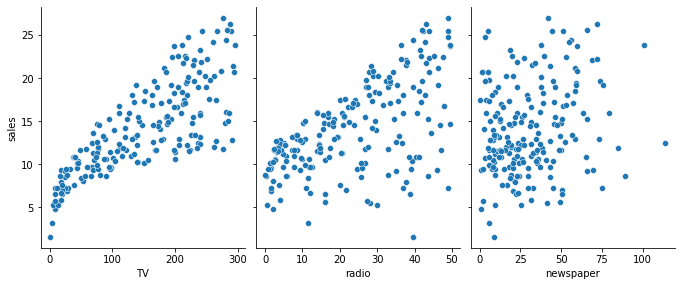

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#使用散点图可视化特征与响应之间的关系：这里选择TV，radio，newspaper作为特征，sales作为观测值
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=4, aspect=0.8)
plt.show() #注意在最后要加上显示函数，否则无法显示。

通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。

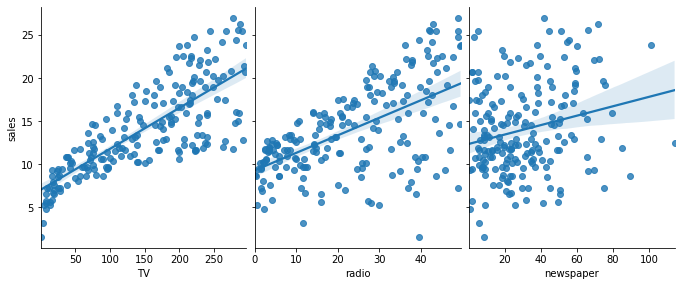

In [5]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=4, aspect=0.8, kind='reg')
plt.show()

上图是运行后的拟合效果图。从这三幅图大致可以看出TV、radio、newspaper分别与sales的关系，从而得出三者线性关系的强弱关系：TV>radio>newspaper

2.2 构建模型

2.2.1 使用pandas构建X（特征向量）和y（标签列）

sklearn要求X是一个特征矩阵，y是一个numpy向量。X可以是pandas的DataFrame，y可以是pandas的Series，这样sklearn就可以理解这种结构。

In [6]:
#创建特征列表
feature_cols = ['TV', 'radio', 'newspaper']

#使用列表选择原始DataFrame的子集
X = data[feature_cols]     #等价于X = data[['TV', 'radio', 'newspaper']]

# 输出前五项数据
print(X.head())
#检查X的类型
print(type(X))
#查看X的维度
print(X.shape)

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
<class 'pandas.core.frame.DataFrame'>
(200, 3)


查看数据集中的数据：

In [7]:
#从DataFrame中选择一个Series
y = data['sales']  #等价于y = data.sales
# 输出前五项数据
print(y.head())
#检查Y的类型
print(type(y))
#查看Y的维度
print(y.shape)

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64
<class 'pandas.core.series.Series'>
(200,)


2.2.2 构建训练集与测试集

构建训练集和测试集，分别保存在X_train，y_train，Xtest，y_test

In [8]:
from sklearn.model_selection import train_test_split     #这里采用交叉验证
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# 75%用于训练集，25%用于测试
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


2.2.3 sklearn的线性回归

In [9]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  #创建线性回归对象
linreg.fit(X_train, y_train) #进行线性回归训练
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print (linreg.intercept_)  #输出线性回归的截距
print (linreg.coef_) #输出线性回归的各个系数

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


这里补充讲解sklearn库中的LinearRegression()的参数：

copy_X:默认为True，当为True时，X会被copied,否则X将会被覆写；

fit_intercept:是否有截据，如果没有则直线过原点；

n_jobs:默认值为1。计算时使用的核数；

normalize:是否将数据归一化。

输出变量的回归系数：

In [10]:
# 将特征名称与系数对应
zip(feature_cols, linreg.coef_)

2.2.4 预测

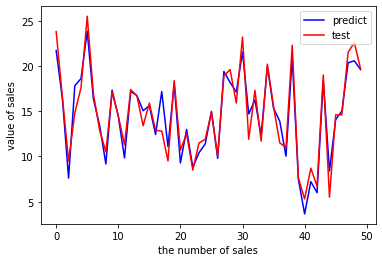

In [11]:
y_pred = linreg.predict(X_test)  #将测试集投入模型进行训练
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

### 编程要求

复习pandas基本操作，使用pandas库完成以下任务。

1.读取data/2.3下的Advertising.csv，并打印

2.筛选出sales>25的所有数据，并将其所有信息打印出来

## 参考答案

In [9]:
import pandas as pd

#读取csv
data = pd.read_csv('../../data/2.3/Advertising.csv')

print(data[data.sales>25])

     Unnamed: 0     TV  radio  newspaper  sales
36           37  266.9   43.8        5.0   25.4
98           99  289.7   42.3       51.2   25.4
147         148  243.2   49.0       44.3   25.4
175         176  276.9   48.9       41.8   27.0
183         184  287.6   43.0       71.8   26.2
198         199  283.6   42.0       66.2   25.5
